<h1>Model Conclusions</h1>

<b>Import Libraries</b>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [3]:
import eli5
from eli5.sklearn import PermutationImportance
import shap

In [4]:
import warnings
warnings.filterwarnings('ignore')

<b>Import CSV File</b>

In [5]:
heartData= pd.read_csv('heart.csv')# import dataset

In [6]:
heartData #Show dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
heartData.describe()#describe details of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<b>Rename columns</b>

In [8]:
heartData = heartData.rename(columns={"cp": "chestPain", "trestbps": "bloodPressure", "fbs": "bloodSugar", "ca": "Vessels", "chol": "Cholesterol"})
#rename columns
#cp = chest pain
#trestbps = blood Pressure Level
#fbs = blood Sugar Level
#ca = Vessels 
#chol = Cholesterol Level

In [9]:
heartData.columns# show column names after rename

Index(['age', 'sex', 'chestPain', 'bloodPressure', 'Cholesterol', 'bloodSugar',
       'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'Vessels', 'thal',
       'target'],
      dtype='object')

In [10]:
heart_plot = pd.read_csv('heart.csv')
heart_plot = heart_plot.rename(columns={"cp": "chestPain", "trestbps": "bloodPressure", "fbs": "bloodSugar", "ca": "Vessels", "chol": "Cholesterol"})
heart_plot['health_status'] = heart_plot['target']
heart_plot['health_status'] = ["healthy" if x == 0 else "sick" for x in heart_plot['health_status']]

<b>Standardize features</b>

In [11]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'bloodPressure', 'Cholesterol', 'thalach', 'oldpeak']
heartData[columns_to_scale] = standardScaler.fit_transform(heartData[columns_to_scale])

<b>Convert categorical variable into dummy/indicator variables</b>

In [12]:
heartData = pd.get_dummies(heartData, columns = ['sex', 'chestPain', 'bloodSugar', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

<b>Features and target labels to be kept separate (healthy or sick)</b>

In [13]:
labels = heartData['target']
features = heartData.drop(['target'], axis = 1)

Create two sets of features and target labels: one for training and one for testing

In [14]:
features_train , features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2, random_state=42)

<h1>Summary of the Dataset</h1>
A total of 303 patients were included in the Cleveland dataset from 1988. There were 165 patients with heart disease and 138 people who did not have heart disease among the 303 patients.

<AxesSubplot:xlabel='health_status', ylabel='count'>

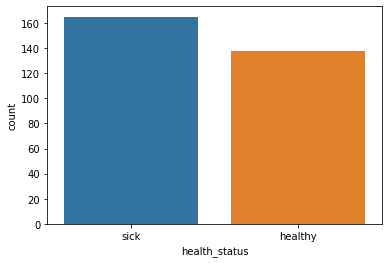

In [15]:
sns.countplot(data=heart_plot, x= 'health_status')#show health Status in table

We sought to model and forecast the presence of heart disease in patients more widely based on 13 features included about each patient (given below). We also wanted to figure out which characteristics were particularly strong markers of heart disease:

<li>age</li>
<li>sex</li>
<li>chest pain type</li>
<li>resting blood pressure</li>
<li>serum cholestorol in mg/dl</li>
<li>fasting blood sugar > 120 mg/dl</li>
<li>resting electrocardiographic results</li>
<li>maximum heart rate achieved</li>
<li>exercise induced angina</li>
<li>oldpeak = ST depression induced by exercise relative to rest</li>
<li>the slope of the peak exercise ST segment</li>
<li>number of major vessels colored by fluoroscopy</li>
<li>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (thallium heart scan or stress test)</li>